Dylan Hastings

# Exercise 1

Plot the function

$$
f(x) = \cos(\pi \theta x) \exp(-x)
$$

over the interval $ [0, 5] $ for each $ \theta $ in `np.linspace(0, 2, 10)`.

Place all the curves in the same figure.

The output should look like this

![](matplotlib_ex1.png)

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

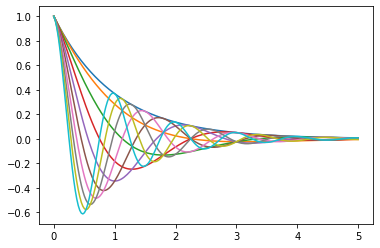

In [2]:
fig, ax = plt.subplots()
o = np.linspace(0, 2, 10)
x = np.linspace(0, 5, 200)
for e in o:
    y = np.cos(e * x * np.pi) * np.exp(-x)
    ax.plot(x,y)
plt.show()

# Exercise 2

Reproduce the plot below:

![](federer.png)

Given the `data/tennis.csv` file.

Note that the y axis is the ration of `double faults` that Federer did over his `total points total` in a match

In [3]:
tn = pd.read_csv('data/tennis.csv')

In [4]:
tn['start date'] = pd.to_datetime(tn['start date'])
tn['ratio'] =  tn['player1 double faults'] / tn['player1 total points total']
y = tn.groupby('year')['ratio'].mean()

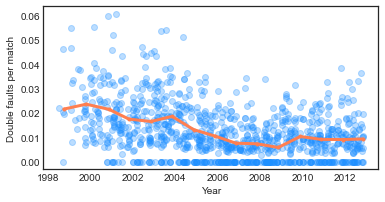

In [5]:
mpl.style.use('seaborn-white')
fig, ax = plt.subplots(figsize = (6,3))
ax.plot_date(data=tn, x="start date", y="ratio", alpha = 0.3, c='dodgerblue')
ax.plot_date(x=tn.groupby("year")['start date'].max(), y=y, ls='-', marker='.',c='coral', lw=3)
ax.set_xlabel("Year")
ax.set_ylabel("Double faults per match")
ax.set_yticks([0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06])
plt.show()

# Exercise 3

With these imports:

```python
import datetime as dt
from pandas_datareader import data
```

If needed, install the datareader with

```
!pip install --upgrade pandas-datareader
```

Write a program to calculate the percentage price change over 2019 for the following shares:

```python
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}
```               

Here’s the first part of the program:

```python
def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)
```

Complete the program to plot the result as a bar graph like this one for each:

![](pandas_share_prices.png)


In [6]:
import datetime as dt
from pandas_datareader import data

In [7]:
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}

In [8]:
def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    changes = []
    names = []
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices
        start_price = closing_prices[0]
        end_price = closing_prices[-1]
        perc_change = ((end_price - start_price) / start_price) * 100
        changes.append(perc_change)
        names.append(ticker_list[tick])
        stock_changes = pd.Series(changes, names)
    
    stock_changes = stock_changes.sort_values()
    fig, ax = plt.subplots()
    plt.bar(stock_changes.index, stock_changes.values)
    ax.set_xlabel("stock")
    ax.set_ylabel("percentage change in price")
    plt.xticks(rotation='vertical')
    
    return ticker

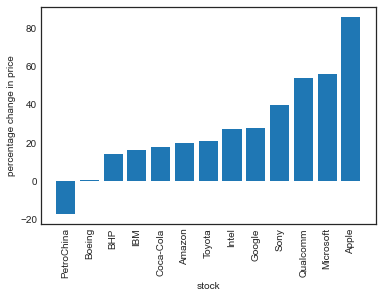

In [9]:
ticker = read_data(ticker_list)

# Exercise 4

Using the method `read_data` introduced in Exercise 1, write a program to obtain year-on-year percentage change for the following indices:

```
indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}
```

Complete the program to show summary statistics and plot the result as a time series graph like this one:

![](pandas_indices_pctchange.png)

In [58]:
indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}

In [59]:
def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()
    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices
    return ticker
ticker = read_data(ticker_list)

In [60]:
# Start time set to 1970 since this is the earliest that is supported on Windows machines
indices_data = read_data(
        indices_list,
        start=dt.datetime(1970, 1, 2),
        end=dt.datetime(2020, 12, 31)
)

In [61]:
yearly_returns = pd.DataFrame()

In [62]:
indices_data

,^GSPC,^IXIC,^DJI,^N225
Date,,,,
1970-01-02,93.000000,NaN,NaN,NaN
1970-01-05,93.459999,NaN,NaN,2402.850098
1970-01-06,92.820000,NaN,NaN,2406.219971
1970-01-07,92.629997,NaN,NaN,2394.959961
1970-01-08,92.680000,NaN,NaN,2283.679932
...,...,...,...,...
2020-12-07,3691.959961,12519.950195,30069.789062,26547.439453
2020-12-08,3702.250000,12582.769531,30173.880859,26467.080078
2020-12-09,3672.820068,12338.950195,30068.810547,26817.939453


In [63]:
for index, name in indices_list.items():
    p1 = indices_data.groupby(indices_data.index.year)[index].first()    
    p2 = indices_data.groupby(indices_data.index.year)[index].last()
    returns = (p2 - p1) / p1
    yearly_returns[name] = returns

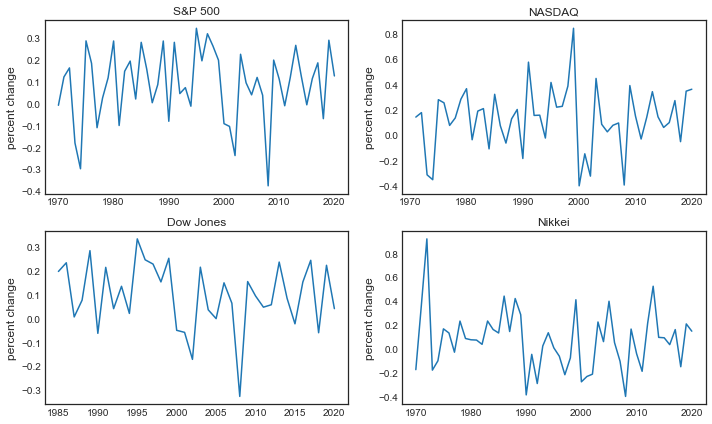

In [64]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
for iter_, ax in enumerate(axes.flatten()):            # Flatten 2-D array to 1-D array
    index_name = yearly_returns.columns[iter_]         # Get index name per iteration
    ax.plot(yearly_returns[index_name])                
    ax.set_ylabel("percent change", fontsize = 12)
    ax.set_title(index_name)
plt.tight_layout()

# Exercise 5: Multi Plot

Recall exercise 2's plot.

Make the same plot tracking double faults over time, except make one such plot for each surface type (indoor hard, outdoor clay, etc.)

Have all 6 plots (one per surface type) be in the same matplotlib figure together, similar to the plot we saw in part 4 of the lecture.

In [71]:
surfaces = list(tn.surface.unique())

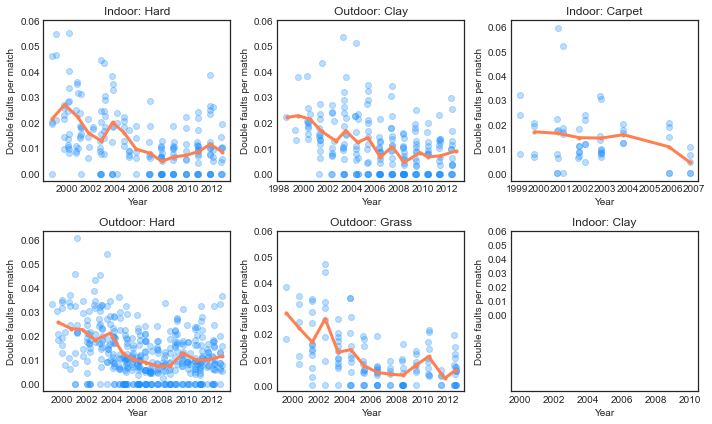

In [72]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
for iter_, ax in enumerate(axes.flatten()):               # Flatten 2-D array to 1-D array
    mpl.style.use('seaborn-white')
    surf_ratios = tn.loc[(tn.surface == surfaces[iter_])] # Get surface per iteration
    surf_ratios = surf_ratios[['start date', 'year', 'ratio']]
    ax.plot_date(data=surf_ratios, x="start date", y="ratio", alpha = 0.3, c='dodgerblue')
    ax.plot_date(x=surf_ratios.groupby("year")['start date'].max(),
                 y=surf_ratios.groupby("year")['ratio'].mean(), ls='-', marker='.',c='coral', lw=3)
    ax.set_xlabel("Year")
    ax.set_ylabel("Double faults per match")
    ax.set_yticks([0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06])
    ax.set_title(surfaces[iter_])
plt.tight_layout()